**Exercise:**    In NSFG Cycles 6 and 7, the variable `cmdivorcx` contains the date of divorce for the respondent’s first marriage, if applicable, encoded in century-months.

Compute the duration of marriages that have ended in divorce, and the duration, so far, of marriages that are ongoing. Estimate the hazard and survival curve for the duration of marriage.

Use resampling to take into account sampling weights, and plot data from several resamples to visualize sampling error.

Consider dividing the respondents into groups by decade of birth, and possibly by age at first marriage.

In [28]:
def CleanData(resp):
    """Cleans respondent data.

    resp: DataFrame
    """
    resp.cmdivorcx.replace([9998, 9999], np.nan, inplace=True)

    resp['notdivorced'] = resp.cmdivorcx.isnull().astype(int)
    resp['duration'] = (resp.cmdivorcx - resp.cmmarrhx) / 12.0
    resp['durationsofar'] = (resp.cmintvw - resp.cmmarrhx) / 12.0

    month0 = pd.to_datetime('1899-12-15')
    dates = [month0 + pd.DateOffset(months=cm) 
             for cm in resp.cmbirth]
    resp['decade'] = (pd.DatetimeIndex(dates).year - 1900) // 10

In [29]:
CleanData(resp6)
married6 = resp6[resp6.evrmarry==1]

CleanData(resp7)
married7 = resp7[resp7.evrmarry==1]

In [33]:
# Call the EstimateHazardFunction on the data 
EstimateHazardFunction(married6['duration'], married6['durationsofar'], label='')

ValueError: complete contains NaNs

In [37]:
# Remove NaNs from data sets
complete = married6[married6.notdivorced==0].duration.dropna()
ongoing = married6[married6.notdivorced==1].durationsofar.dropna()

In [38]:
# Call the Estimate function now since nans have been removed
EstimateHazardFunction(complete, ongoing, label='')

<ipython-input-12-b868743a10e5>:26: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  lams = pd.Series(index=ts)


<ipython-input-12-b868743a10e5>:26: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  lams = pd.Series(index=ts)


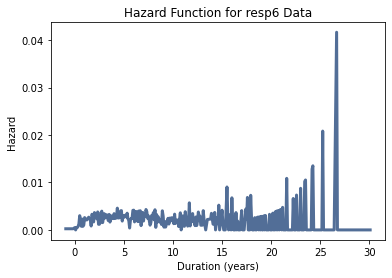

In [41]:
# Plot hazard function for duration ended in divorce
hf = EstimateHazardFunction(complete, ongoing)
thinkplot.Plot(hf)
thinkplot.Config(xlabel='Duration (years)',
                 ylabel='Hazard', title='Hazard Function for resp6 Data')

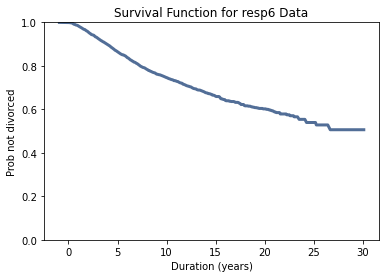

In [43]:
# Plot corresponding survival funtion depicting probability of not getting divorced. 
# We can see the curve flattens out around 25 years indicating that if a marriage lasts 25 years, it's unlikely that they
# will get divorced.
sf = hf.MakeSurvival()
thinkplot.Plot(sf)
thinkplot.Config(xlabel='Duration (years)',
                 ylabel='Prob not divorced',
                 ylim=[0, 1],
                title='Survival Function for resp6 Data')

In [45]:
# Remove nans and call EstimateHazardFunction for resp7 data
complete2 = married7[married7.notdivorced==0].duration.dropna()
ongoing2 = married7[married7.notdivorced==1].durationsofar.dropna()
EstimateHazardFunction(complete2, ongoing2, label='')

<ipython-input-12-b868743a10e5>:26: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  lams = pd.Series(index=ts)


<ipython-input-12-b868743a10e5>:26: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  lams = pd.Series(index=ts)


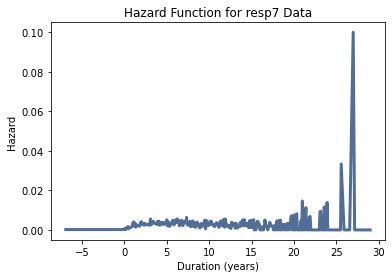

In [49]:
# Plot hazard function for duration ended in divorce
hf2 = EstimateHazardFunction(complete2, ongoing2)
thinkplot.Plot(hf2)
thinkplot.Config(xlabel='Duration (years)',
                 ylabel='Hazard', title='Hazard Function for resp7 Data')

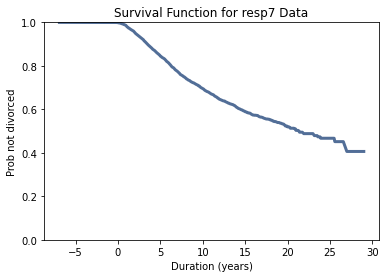

In [50]:
# Plot corresponding survival funtion depicting probability of not getting divorced. 
sf2 = hf2.MakeSurvival()
thinkplot.Plot(sf2)
thinkplot.Config(xlabel='Duration (years)',
                 ylabel='Prob not divorced',
                 ylim=[0, 1],
                title='Survival Function for resp7 Data')

In [53]:
# Alter these functions for work for the new problem

def EstimateSurvival(resp):

    complete = resp[resp.notdivorced==0].duration.dropna()
    ongoing = resp[resp.notdivorced==1].durationsofar.dropna()

    hf = EstimateHazardFunction(complete, ongoing)
    sf = hf.MakeSurvival()

    return hf, sf

def ResampleSurvival(resp, iters=101):
    
    _, sf = EstimateSurvival(resp)
    thinkplot.Plot(sf)
    
    low, high = resp.duration.min(), resp.duration.max()
    ts = np.arange(low, high, 1/12.0)

    ss_seq = []
    for _ in range(iters):
        sample = thinkstats2.ResampleRowsWeighted(resp)
        hf, sf = EstimateSurvival(sample)
        ss_seq.append(sf.Probs(ts))

    low, high = thinkstats2.PercentileRows(ss_seq, [5, 95])
    thinkplot.FillBetween(ts, low, high, color='gray', label='90% CI')

<ipython-input-12-b868743a10e5>:26: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  lams = pd.Series(index=ts)
<ipython-input-12-b868743a10e5>:26: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  lams = pd.Series(index=ts)


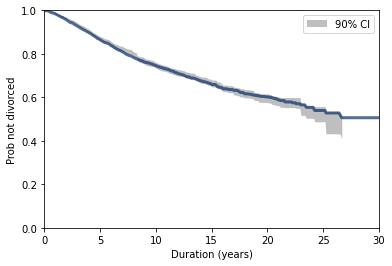

In [54]:
# Plot resampling with weights for resp6
ResampleSurvival(married6)
thinkplot.Config(xlabel='Duration (years)',
                 ylabel='Prob not divorced',
                 xlim=[0, 30],
                 ylim=[0, 1],
                 loc='upper right')

<ipython-input-12-b868743a10e5>:26: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  lams = pd.Series(index=ts)
<ipython-input-12-b868743a10e5>:26: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  lams = pd.Series(index=ts)


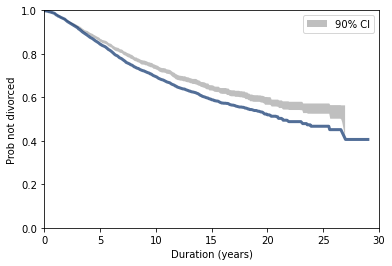

In [55]:
# Plot resampling with weights for resp7
ResampleSurvival(married7)
thinkplot.Config(xlabel='Duration (years)',
                 ylabel='Prob not divorced',
                 xlim=[0, 30],
                 ylim=[0, 1],
                 loc='upper right')

In [61]:
# Divide respondents into groups by decade of birth
# The CleanData function already created the decade variable that I will use to view the results of the survival function
# by decade of birth cohorts. I need to amend these function for the current problem.

def EstimateSurvivalByDecade(groups, **options):
    thinkplot.PrePlot(len(groups))
    for _, group in groups:
        _, sf = EstimateSurvival(group)
        thinkplot.Plot(sf, **options)

def PlotResampledByDecade(resps, iters=1, predict_flag=False, omit=None):
    for i in range(iters):
        samples = [thinkstats2.ResampleRowsWeighted(resp) 
                   for resp in resps]
        sample = pd.concat(samples, ignore_index=True)
        groups = sample.groupby('decade')

        if omit:
            groups = [(name, group) for name, group in groups 
                      if name not in omit]

        # TODO: refactor this to collect resampled estimates and
        # plot shaded areas
        if i == 0:
            AddLabelsByDecade(groups, alpha=0.7)

        if predict_flag:
            PlotPredictionsByDecade(groups, alpha=0.1)
            EstimateSurvivalByDecade(groups, alpha=0.1)
        else:
            EstimateSurvivalByDecade(groups, alpha=0.2)

In [59]:
# Need to define the resps variable
resps = [married6, married7]

<ipython-input-12-b868743a10e5>:26: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  lams = pd.Series(index=ts)
<ipython-input-12-b868743a10e5>:26: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  lams = pd.Series(index=ts)
<ipython-input-12-b868743a10e5>:26: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  lams = pd.Series(index=ts)
<ipython-input-12-b868743a10e5>:26: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  lams = pd.Series(index=ts)
<ipython-input-12-b868743a10e5>:26: DeprecationWarning: The default dtype fo

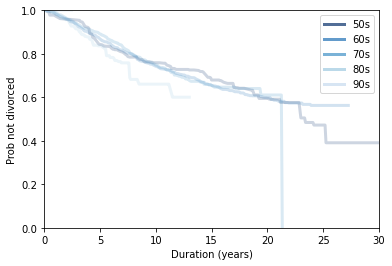

In [62]:
# Plot the resamples by decade by calling the functions previously defined. 
PlotResampledByDecade(resps)
thinkplot.Config(xlabel='Duration (years)',
                   ylabel='Prob not divorced',
                   xlim=[0, 30],
                   ylim=[0, 1])        